# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [7]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
from types import SimpleNamespace
from scipy import optimize
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



### 2.1. <a id='toc2_1_'></a>[Basic Edgeworth box](#toc0_)

# Question 1

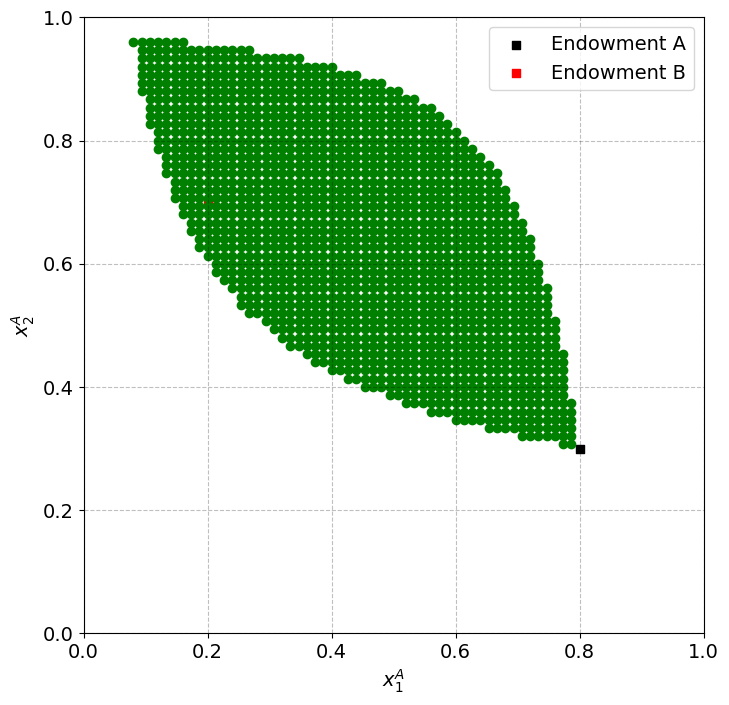

In [8]:
# The code for solving the model is in the class below
from inauguralproject import EdgeworthBoxClass 

box = EdgeworthBoxClass()

# The Edgeworth box with Pareto improvements for the set C
box.plot_edgeworth_box()

# Question 2

Explain your code and procedure

In [9]:


class ErrorMarketClass:
    def __init__(self):
        par = self.par = SimpleNamespace()
        # a. The values of the parameters alpha and beta
        par.alpha = 1/3 
        par.beta = 2/3
        # b. The initial endowments
        par.w1A = 0.8
        par.w2A = 0.3
        # c. We set the Numeraire
        par.p2 = 1
        # d. We set the number of allocations
        self.N = 75

    def utility_A(self, x1A, x2A):
        # Utility for consumer A using a Cobb-Douglas utility function
        return x1A ** self.par.alpha * x2A ** (1 - self.par.alpha)

    def utility_B(self, x1B, x2B):
        # Utility for consumer B using a Cobb-Douglas utility function
        return x1B ** self.par.beta * x2B ** (1 - self.par.beta)

    def demand_A(self, p1):
        # Optimal demand function for consumer A's two goods, x1A_star, x2A_star
        x1A_star = self.par.alpha * (p1 * self.par.w1A + self.par.p2 * self.par.w2A) / p1
        x2A_star = (1 - self.par.alpha) * (p1 * self.par.w1A + self.par.p2 * self.par.w2A) / self.par.p2
        return x1A_star, x2A_star

    def demand_B(self, p1):
        # Optimal demand function for consumer B two goods, x1B_star, x2B_star
        x1B_star = self.par.beta * (p1 * (1 - self.par.w1A) + self.par.p2 * (1 - self.par.w2A)) / p1
        x2B_star = (1 - self.par.beta) * (p1 * (1 - self.par.w1A) + self.par.p2 * (1 - self.par.w2A)) / self.par.p2
        return x1B_star, x2B_star

    def check_market_clearing(self):
        # We find the market clearing condition for the problem
        par = self.par
        # 
        self.rho1 = [0.5 + 2 * i / self.N for i in range(self.N + 1)]

        errors = []

        for p1 in self.rho1:
            # Iterate through different price levels of p1 in rho1 and calculating the errors in the market clearing condition
            x1A_star, x2A_star = self.demand_A(p1)
            x1B_star, x2B_star = self.demand_B(p1)
            # Errors, eps1 and eps2 in the market clearing condition 
            eps1 = x1A_star - par.w1A + x1B_star - (1 - par.w1A)
            eps2 = x2A_star - par.w2A + x2B_star - (1 - par.w2A)
            # storing the errors
            errors.append((eps1, eps2))

        return errors

# We create a variable for the class
errormarket = ErrorMarketClass()

# We solve the 
result = errormarket.check_market_clearing()

# We rint the errors in the market clearing condition
print("Errors in the market clearing condition:")
for eps1, eps2 in result:
    print(f"Error 1: {eps1}, Error 2: {eps2}")



Errors in the market clearing condition:
Error 1: 0.533333333333333, Error 2: -0.2666666666666666
Error 1: 0.47594936708860747, Error 2: -0.25066666666666654
Error 1: 0.42409638554216855, Error 2: -0.23466666666666652
Error 1: 0.3770114942528735, Error 2: -0.2186666666666665
Error 1: 0.33406593406593377, Error 2: -0.2026666666666665
Error 1: 0.2947368421052629, Error 2: -0.18666666666666654
Error 1: 0.2585858585858586, Error 2: -0.1706666666666664
Error 1: 0.22524271844660193, Error 2: -0.1546666666666665
Error 1: 0.19439252336448576, Error 2: -0.1386666666666665
Error 1: 0.16576576576576557, Error 2: -0.12266666666666659
Error 1: 0.13913043478260856, Error 2: -0.10666666666666658
Error 1: 0.11428571428571421, Error 2: -0.09066666666666645
Error 1: 0.09105691056910548, Error 2: -0.07466666666666644
Error 1: 0.06929133858267705, Error 2: -0.05866666666666642
Error 1: 0.048854961832061006, Error 2: -0.04266666666666663
Error 1: 0.029629629629629395, Error 2: -0.026666666666666616
Error 1

# Question 3

Finding a market clearing price in `Question3.py`

In [10]:
from inauguralproject import MarketClearPriceClass

In [11]:
# We first define the initial parameters
endowments = (0.8, 0.3) # Initial endowments for x1A and x2A
alphas = 1/3
betas = 2/3
N = 75  # value of N in rho1

# Set up optimization problem
initial_guess = ((0.5+3)*1/N, 1)  # Initial guess for prices p1 in the price vector and p2 is numeraire
bounds = [(0.5, 2.5), (None, None)]  # These are the bounds for pricec p1 and price p2 (first is lower, second is upper)

# We create an instance of MarketClearPriceClass
market_clear_price = MarketClearPriceClass()

# Call the optimizer with the objective function
res = optimize.minimize(
    lambda price: market_clear_price.objective_function(endowments, alphas, betas, N), initial_guess,
    method="SLSQP", bounds=bounds
)

# We extract the market clearing price, p1, from the optimization result
market_clearing_price_p1 = res.x[0]
print("The market clearing price for p1 is:", market_clearing_price_p1)

The market clearing price for p1 is: 0.5


# Question 4a

In [12]:

from inauguralproject import UtilityOptimization

alpha=1/3
wA1 = 0.8
wA2 = 0.3
N=75
p2=1

consumer_a = UtilityOptimization(wA1=0.8,wA2=0.3,N=75,alpha=1/3,p2=1)

# 1. We define the parameters
N = 75
P1 = [0.5 + 2 * i / N for i in range(N + 1)]

# 2. We set up optimization problem for the consumer
initial_guess = [1]  
bounds = [(0.5, 2.5)]  

# 3. We optimize the objective function
solution_to_4a = optimize.minimize(
    consumer_a.maximize_A_utility, initial_guess, method="SLSQP", bounds=bounds
)

# 4. We find the optimal price
p1_optimal = solution_to_4a.x[0]
print("The optimal price for consumer A is the following:", p1_optimal)

# 5. We find the optimal allocation
xA1_optimal = alpha * (p1_optimal*wA1 + p2*wA2) / p1_optimal
xA2_optimal = (1-alpha) * (p1_optimal*wA1 + p2*wA2) / p2

# 6. We print the results
print(f"The optimal allocation for consumer A is the following: (xA1, xA2) = ({xA1_optimal}, {xA2_optimal})")

The optimal price for consumer A is the following: 0.5
The optimal allocation for consumer A is the following: (xA1, xA2) = (0.4666666666666666, 0.4666666666666667)


# Question 4b

In [13]:

from inauguralproject import OptimizationWithNoUpperBound

optimizer = OptimizationWithNoUpperBound()

# 3. We optimize
res = optimize.minimize(
    optimizer.maximize_A_utility, initial_guess,
    method="SLSQP", bounds=bounds
)

# 4. We find the optimal price
p1_optimal = res.x[0]
print("The optimal price for consumer A is:", p1_optimal)

The optimal price for consumer A is: 2.5


# Question 5a

Defining a solver in `Question5a.py`



In [14]:
from inauguralproject import AgentOptimization

Find the allocation if the choice set is restricted to C



In [15]:

# Initial guess for x_A1 and x_A2
x0 = [0.5, 0.5]  # The initial guess for x_A1 and x_A2, which should be a feasible guess
alpha = 1/3  # The example value for alpha

# Define the bounds for x_A1 and x_A2
bounds = [(0, 1), (0, 1)]

# Create an instance of AgentOptimization
agent_opt = AgentOptimization(0.8, 0.3, x0, alpha, bounds)

# We solve the problem
optimal_allocation, optimal_utility = agent_opt.solve()

# We print the optimal solution
print("Optimal Allocation for Agent A:", optimal_allocation) # find the allocation

Optimal Allocation for Agent A: [0.41601676 0.41601676]


# Question 5b

In [16]:
from Question5b import AgentOptimization2


x0 = [0.5, 0.5]  # Initial guess for x_A1 and x_A2
alpha = 1/3  # Example value for alpha

# Create an instance of AgentOptimization and solve the problem
agent_opt = AgentOptimization2(x0, alpha)
optimal_allocation, optimal_utility = agent_opt.solve()

# Print the optimal solution
print("Optimal Allocation for Agent A:", optimal_allocation)

ModuleNotFoundError: No module named 'Question5b'

# Question 6a

In [ ]:
from scipy import optimize
import numpy as np
from Question6A import UtilitarianSocialPlanner

# 1. We create instance of UtilitarianSocialPlanner
utilitarian_planner = UtilitarianSocialPlanner()

# 2. We set the parameters
alpha = 0.5
utilitarian_planner.parameters(alpha)

# 3. We define the bounds for the endowments
bounds = [(0, 1), (0, 1)]

# 4. We call the aggregate_utility_functions 
def aggregate_utility_functions(x):
    return utilitarian_planner.aggregate_utility_functions(x)

# 5. We call the optimization function from the scipy
utilitarian_social_planner_solution = optimize.minimize(aggregate_utility_functions, x0=[0.5, 0.5], method='SLSQP', bounds=bounds)

# 6. We print the result
if utilitarian_social_planner_solution.success:
    xA1_optimal, xA2_optimal = utilitarian_social_planner_solution.x
    xB1_optimal = 1 - xA1_optimal
    xB2_optimal = 1 - xA2_optimal
    print("The optimal allocation for the utilitarian social planner is the following:")
    print(f"((xA1_optimal,xA2_optimal),(xB1_optimal,xB2_optimal)) = (({xA1_optimal}, {xA2_optimal}), ({xB1_optimal}, {xB2_optimal}))")
else:
    print("The optimal allocation for the utilitarian social planner was not found")

The optimal allocation for the utilitarian social planner is the following:
((xA1_optimal,xA2_optimal),(xB1_optimal,xB2_optimal)) = ((0.41475624515662524, 0.5863770555786761), (0.5852437548433748, 0.41362294442132386))


# Question 6b

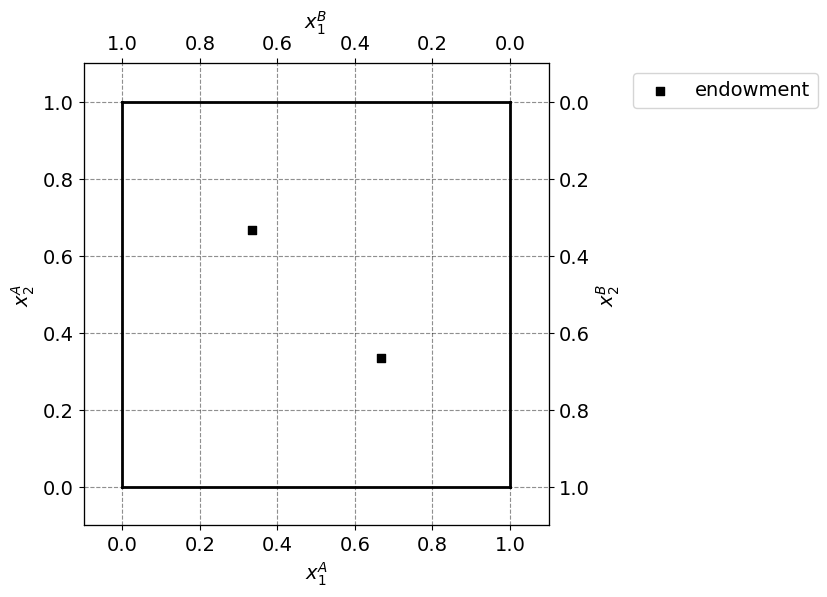

In [ ]:
# We import the class
from Question6B import UtilitarianSocialPlannerEdgeworthBox

# We plot the Edgeworth box
edgeworth_box = UtilitarianSocialPlannerEdgeworthBox()
edgeworth_box.plot_edgeworth_box(xA1_optimal, xA2_optimal, xB1_optimal, xB2_optimal)

Maximizing total welfare will be socially benefinicial from the view of a social planner rather than only maximizing the utility of consumer A. However, this will reduce the utility for this consumer, making him more worse off than in question 4.

# Question 7

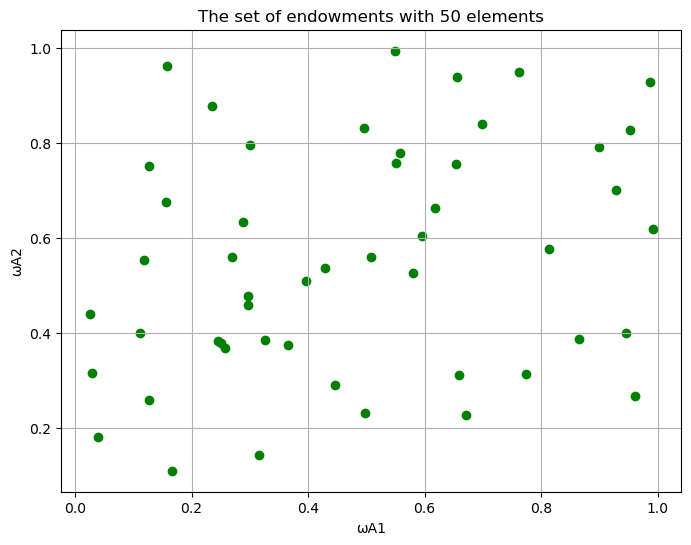

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from Question7 import TotalEndowments 

# We set the number of elements
n=50

# We generate random endowments
wA1 = np.random.uniform(0, 1, n)
wA2 = np.random.uniform(0, 1, n)

# We plot the figure
total_endowments = TotalEndowments(seed=69, n=50)
total_endowments.plot_endowments(wA1, wA2)

# Question 8


The prices for good 1 are the following: [0.5        0.54081633 0.58163265 0.62244898 0.66326531 0.70408163
 0.74489796 0.78571429 0.82653061 0.86734694 0.90816327 0.94897959
 0.98979592 1.03061224 1.07142857 1.1122449  1.15306122 1.19387755
 1.23469388 1.2755102  1.31632653 1.35714286 1.39795918 1.43877551
 1.47959184 1.52040816 1.56122449 1.60204082 1.64285714 1.68367347
 1.7244898  1.76530612 1.80612245 1.84693878 1.8877551  1.92857143
 1.96938776 2.01020408 2.05102041 2.09183673 2.13265306 2.17346939
 2.21428571 2.25510204 2.29591837 2.33673469 2.37755102 2.41836735
 2.45918367 2.5       ]
The optimal allocations are the following: [[[0.77123646 0.72245233 0.68051509 ... 0.25848847 0.25627035 0.25412466]
  [0.77123646 0.78142803 0.79161959 ... 1.25024015 1.26043172 1.27062328]]

 [[0.83365998 0.79465959 0.76113294 ... 0.42374445 0.42197118 0.42025581]
  [0.83365998 0.85952976 0.88539954 ... 2.04953951 2.07540928 2.10127906]]

 [[0.87033061 0.82306022 0.78242427 ... 0.37349291 0.371

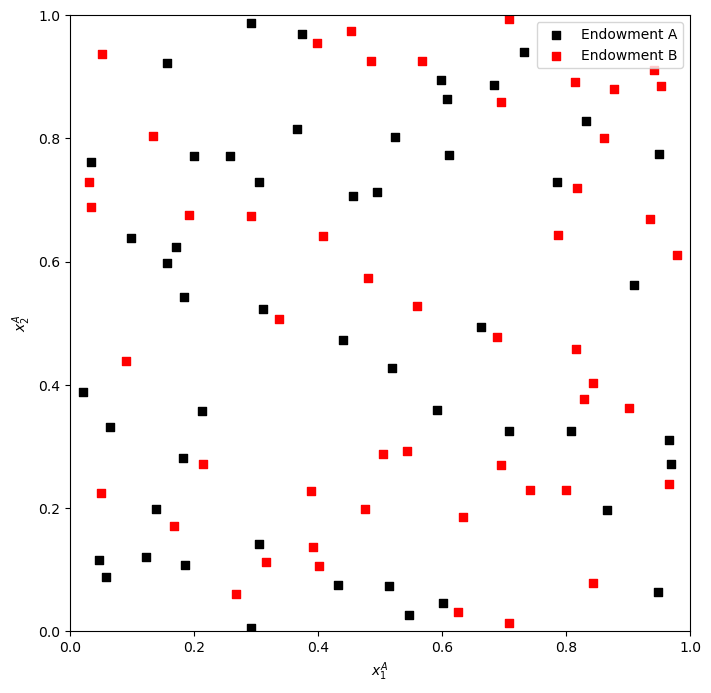

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# We generate random set W with 50 elements
np.random.seed(42)
n = 50
omega_A1 = np.random.uniform(0, 1, n)
omega_A2 = np.random.uniform(0, 1, n)
p1 = np.linspace(0.5, 2.5, n)
omega_B1 = 1-omega_A1
omega_B2 = 1-omega_A2

# We create a function Function to calculate optimal allocation for given omega_A1 and omega_A2
def set_of_optimal_allocations(omega_A1, omega_A2, alpha=1/3, p2=1):
    xA1 = alpha * (p1 * omega_A1 + p2 * omega_A2) / p1
    xA2 = (1 - alpha) * (p1 * omega_A1 + p2 * omega_A2) / p2
    return xA1, xA2

# We use a list iteration in order to calculate the optimal allocations for each omega in the total endowments set, W
allocations = np.array([set_of_optimal_allocations(omega_A1, omega_A2) for omega_A1, omega_A2 in zip(omega_A1, omega_A2)])

print("The prices for good 1 are the following:", p1)
print("The optimal allocations are the following:", allocations)

# Plot the Edgeworth box with Pareto improvements
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlabel("$x_1^A$") # setting x-axis label
ax.set_ylabel("$x_2^A$") # setting y-axis label
# Setting the limits
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Plotting endowment points
ax.scatter(omega_A1, omega_A2, marker='s', color='black', label='Endowment A')
ax.scatter(omega_B1, omega_B2, marker='s', color='red', label='Endowment B')

ax.legend() # We add legend
plt.show() # We display the plot
